This is formatting and aligning data from Copernicus EMS data: https://rapidmapping.emergency.copernicus.eu/

In [1]:
import geopandas as gpd
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import yaml
from rasterio.crs import CRS
import pandas as pd

In [42]:
yaml_file = '../events/bolivia_fire_2023.yml' #'porto_algre.yml'
with open(yaml_file) as f:
    event_dict = yaml.safe_load(f)["event"]
event_dict

{'event_name': 'bolivia_fire_2023',
 'bounds': [23.84811098, 38.02547756, 23.96650282, 38.24431915],
 'event_date': '2024-11-20',
 'pre_event_window_days': 100,
 'post_event_window_days': 60,
 'rtc_track_numbers': [7],
 'mgrs_tiles': ['34SGH'],
 'dist_hls_confirmed_change_min_days': 30,
 'source_id': 'Copernicus EMSR746',
 'links': ['https://storymaps.arcgis.com/stories/4d46c2a0f7604a90992855074ea1cd5f',
  'data: https://rapidmapping.emergency.copernicus.eu/EMSR709/',
  'https://www.independent.co.uk/news/world/europe/greece-wildfires-latest-satellite-images-b2595495.html']}

In [45]:
df_event = gpd.read_file('../external_validation_data/copernicus_ems/bolivia_fire_2023/EMSR709_AOI01_DEL_PRODUCT_v2/EMSR709_AOI01_DEL_PRODUCT_observedEventA_v2.shp')
df_event.head()

,event_type,obj_desc,det_method,notation,dmg_src_id,area,geometry
0,8-Wildfire,"Land fire: Brush, bush, Pasture",Semi-automatic extraction,Burnt area,2,0.6084,"POLYGON ((-67.42291 -14.32810, -67.42291 -14.3..."
1,8-Wildfire,"Land fire: Brush, bush, Pasture",Semi-automatic extraction,Burnt area,2,1.0692,"POLYGON ((-67.29271 -14.32687, -67.29271 -14.3..."
2,8-Wildfire,"Land fire: Brush, bush, Pasture",Semi-automatic extraction,Burnt area,2,1.2528,"POLYGON ((-67.29076 -14.32794, -67.29076 -14.3..."
3,8-Wildfire,"Land fire: Brush, bush, Pasture",Semi-automatic extraction,Burnt area,2,0.8388,"POLYGON ((-67.42612 -14.33012, -67.42612 -14.3..."
4,8-Wildfire,"Land fire: Brush, bush, Pasture",Semi-automatic extraction,Burnt area,2,4.8060,"POLYGON ((-67.42666 -14.33203, -67.42666 -14.3..."


<Axes: >

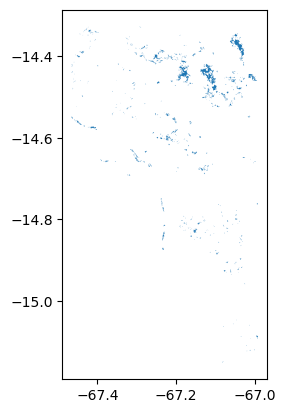

In [46]:
df_event.plot()

In [48]:
df_event.total_bounds

array([-67.46539879, -15.15161343, -66.99244587, -14.32687002])

In [49]:
geo = df_event.geometry.unary_union

df_event_f = gpd.GeoDataFrame({'name': [event_dict['event_name']],
                               'date': [pd.to_datetime(event_dict['event_date'])],
                               'source_id': [f'Copernicus {event_dict["source_id"]}']},
                              geometry=[geo],
                              crs=CRS.from_epsg(4326))
df_event_f.head()

,name,date,source_id,geometry
0,bolivia_fire_2023,2024-11-20,Copernicus Copernicus EMSR746,"MULTIPOLYGON (((-67.37929 -14.65926, -67.37929..."


In [50]:
EXTERNAL_VAL_DATA_DIR = Path('../external_validation_data_db/')
EXTERNAL_VAL_DATA_DIR.mkdir(exist_ok=True, parents=True)

In [51]:
df_event_f.to_file(EXTERNAL_VAL_DATA_DIR / f'{event_dict["event_name"]}.geojson', driver='GeoJSON')